<a href="https://colab.research.google.com/github/nielsenreaveley/Projects/blob/main/food_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Identification Projects on 10 classes of food:

We achieved test accuracy of over 90% on this project

In [ ]:
!nvidia-smi

Wed Nov  1 15:44:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Get helper_functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-11-01 15:44:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-01 15:44:36 (120 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-11-01 15:44:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   220MB/s    in 0.7s    

2023-11-01 15:44:41 (220 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

We are using tf.data.Dataset API below, which is much more efficient (faster) than the ImageDataGenerator API which is paramount for larger datasets.

In [ ]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels? binary would be binary
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent
# notice 4th dimension below, which is None, it represents the batch size we've implemented

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:

# See an example batch of data: that's what take method does
for images, labels in train_data_10_percent.take(1):
  print(images, labels)


tf.Tensor(
[[[[  2.          5.         10.       ]
   [  2.          5.         10.       ]
   [  2.          5.         10.       ]
   ...
   [251.        255.        255.       ]
   [251.        255.        255.       ]
   [251.        255.        255.       ]]

  [[  2.          5.         10.       ]
   [  2.          5.         10.       ]
   [  2.          5.         10.       ]
   ...
   [251.        255.        255.       ]
   [251.        255.        255.       ]
   [251.        255.        255.       ]]

  [[  1.505102    4.5051017   9.505102 ]
   [  2.9438777   5.9438777  10.943878 ]
   [  2.122449    5.122449   10.122449 ]
   ...
   [251.        255.        255.       ]
   [251.        255.        255.       ]
   [251.        255.        255.       ]]

  ...

  [[  2.          5.         12.       ]
   [  2.          5.         12.       ]
   [  2.          5.         12.       ]
   ...
   [ 26.877554   27.877554   55.877556 ]
   [ 27.25509    28.040827   56.04083  ]
   [ 

# Model 0: Building a transfer learning model using the Keras Functional API

In [ ]:
# create base class with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=0) # set to false as we want to set our own dense layer to set number of classes (tops)

# freeze base model (don't change base layers for this model)
base_model.trainable=False

# create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) # THIS CAN BE COMMON REASON MODEL WON'T RUN, IF NEEDS TO BE RESCALED

# pass the inputs to the base model
x = base_model(inputs)

# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# average pool the outputs of the base model (aggregate all the most important information, reduce number of computations
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer") (x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# create output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer") (x)

# combine the inputs and outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# compile model
model_0.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")]) # create_tensorboard_callback
                                 # was part of script we imported from functions we made in previous projects, so that we can save time not having to
                                 # rewrite them

16705208/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231101-154502
Epoch 1/5
24/24 [==============================] - 23s 285ms/step - loss: 1.9551 - accuracy: 0.3533 - val_loss: 1.3272 - val_accuracy: 0.7352
Epoch 2/5
24/24 [==============================] - 4s 142ms/step - loss: 1.1345 - accuracy: 0.7600 - val_loss: 0.8680 - val_accuracy: 0.8388
Epoch 3/5
24/24 [==============================] - 5s 190ms/step - loss: 0.8043 - accuracy: 0.8293 - val_loss: 0.6768 - val_accuracy: 0.8734
Epoch 4/5
24/24 [==============================] - 5s 184ms/step - loss: 0.6486 - accuracy: 0.8547 - val_loss: 0.5760 - val_accuracy: 0.8816
Epoch 5/5
24/24 [==============================] - 4s 148ms/step - loss: 0.5494 - accuracy: 0.8893 - val_loss: 0.5267 - val_accuracy: 0.8766


In [ ]:
# See an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[9.76530609e+01 7.90663223e+01 6.50663223e+01]
   [1.04392860e+02 8.82500000e+01 7.33214264e+01]
   [1.09520409e+02 9.69591827e+01 8.36683655e+01]
   ...
   [2.44423492e+02 2.37423492e+02 2.19423492e+02]
   [2.46760208e+02 2.39760208e+02 2.21760208e+02]
   [2.48000000e+02 2.41000000e+02 2.23000000e+02]]

  [[1.06326530e+02 8.95204086e+01 7.75867386e+01]
   [1.11239799e+02 9.68877640e+01 8.40918427e+01]
   [1.50612244e+02 1.41198990e+02 1.26897964e+02]
   ...
   [2.40857162e+02 2.33857162e+02 2.15857162e+02]
   [2.45071442e+02 2.38071442e+02 2.20071442e+02]
   [2.47000000e+02 2.40000000e+02 2.22000000e+02]]

  [[1.15163269e+02 1.02295921e+02 9.33724518e+01]
   [1.54887756e+02 1.45117355e+02 1.34989807e+02]
   [2.00071426e+02 1.92836746e+02 1.79790833e+02]
   ...
   [2.40357193e+02 2.33357193e+02 2.15357193e+02]
   [2.43642868e+02 2.36642868e+02 2.18642868e+02]
   [2.44571426e+02 2.37571426e+02 2.19571426e+02]]

  ...

  [[1.41214325e+02 5.36428566e+01 5.27959023e+01]
   [1

In [ ]:
# see example batch of data
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
# above is all the layers in our model
# below is summary visual of base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [ ]:
# our whole model summary - only has 4 layers as oriignal model is codensed into 3 here
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

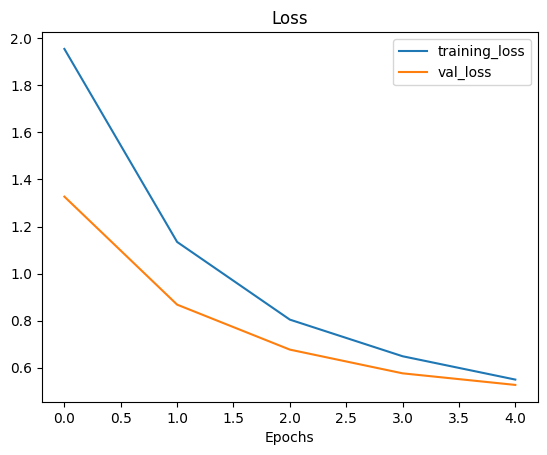

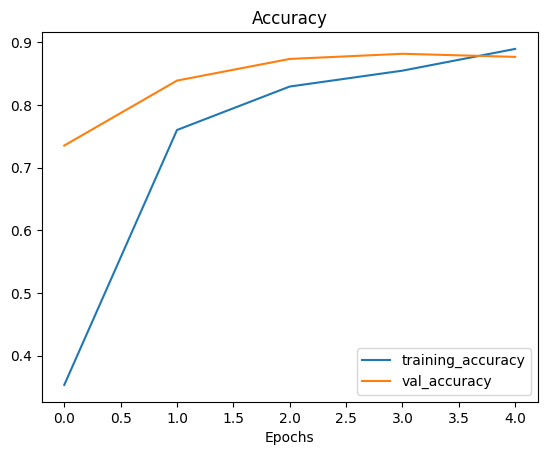

In [ ]:
# Check out our model's training curves
plot_loss_curves(history_10_percent)

# Getting a feature vector from a trained model


In [ ]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")


Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [ ]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes
# axis 1 and axis 2 are second and third number in vector, due to indexing. Numbers below are same as 2d vector above


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

All experiments will be done using the EfficientNetV2B0 model within the tf.keras.applications.efficientnet_v2 module.

To make sure we're keeping track of our experiments, we'll use our create_tensorboard_callback() function to log all of the model training logs.

We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the ImageDataGenerator class as we have previously, we're going to build it right into the model using the tf.keras.layers module.

Let's begin by downloading the data for experiment 1, using feature extraction transfer learning on 1% of the training data with data augmentation.

In [ ]:
# download and unzip data - prepreocessed from food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip") # unzip function is from helper functions we've imported from other project code we made in previous modules


--2023-11-01 15:45:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   143MB/s    in 0.9s    

2023-11-01 15:45:57 (143 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent") # another helper function we made previously

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'

# it's worth mentioning here, we don't need to rescale images with efficient net, as it does it for us! However, for Resnet we do need to rescale! we see this below when augmenting data in our model using sequential, you'll see below code hashed out for case of efficient net, that we need to unhash for resnet!

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32,
                                                                           image_size=IMG_SIZE)


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# Adding data augmentation right into the model

Previously we've used the different parameters of the ImageDataGenerator class to augment our training images, this time we're going to build data augmentation right into the model.

How?

Using the tf.keras.layers module and creating a dedicated data augmentation layer.

This a relatively new feature added to TensorFlow 2.10+ but it's very powerful. Adding a data augmentation layer to the model has the following benefits:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

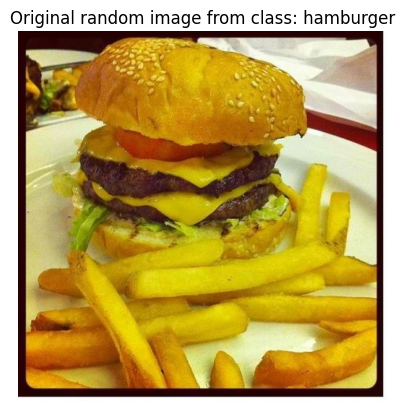

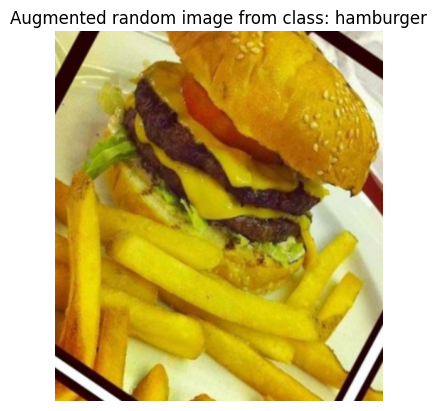

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# the following 4 lines show the code you need to access an image in a directory, and create a path for it. First line below generates random class i.e pizza
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path


img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3) # data augmentation
# is variable name we defined above for augmented images and their conditions
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


# Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# set up input shape and base model, freezing base layers
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False) # This means don't include top layers (dense layers at bottom), as we will create
# our own to set classes ourselves. NOTE: bottom layers in a model are near the top(creation point) of model
base_model.trainable=False

# create input layer
inputs = layers.Input(shape=input_shape, name="input_layer") # we saved ourselves having to write tf.keras before layers as we've imported it in cell above

# add in data augmentation Sequential layer
x = data_augmentation(inputs)

# give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# pool output features of the base model
x = layers.GlobalAveragePooling2D()(x) # can be confusing where to pass x, generally, if it's just layer like this, x goes on right hand side.If it's model
# it goes on left hand side, even augmented sequential layer it goes on left

# create our own dense layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# make a model using inputs and outputs
model_1 = keras.Model(inputs, outputs)

# compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)),
                                # track model training with tensorboard callback
                                callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20231101-154604
Epoch 1/5
3/3 [==============================] - 13s 3s/step - loss: 2.3634 - accuracy: 0.1429 - val_loss: 2.2664 - val_accuracy: 0.1316
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 2.1190 - accuracy: 0.2429 - val_loss: 2.1090 - val_accuracy: 0.2648
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9150 - accuracy: 0.3286 - val_loss: 2.0063 - val_accuracy: 0.3503
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.7402 - accuracy: 0.5714 - val_loss: 1.9082 - val_accuracy: 0.4178
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.5783 - accuracy: 0.6286 - val_loss: 1.8172 - val_accuracy: 0.4737


In [ ]:
# evaluate on whole test dataset off 1% training model
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 87ms/step - loss: 1.8019 - accuracy: 0.4836


[1.801853895187378, 0.483599990606308]

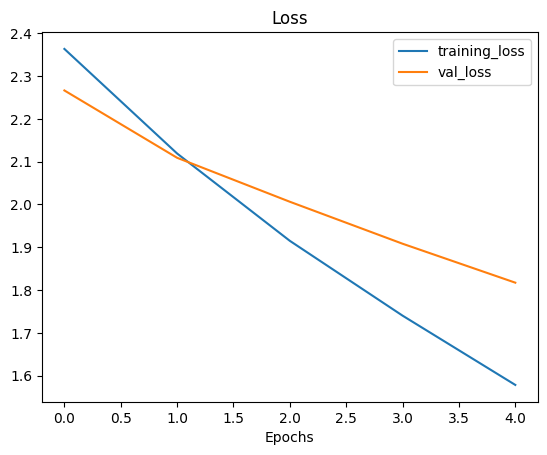

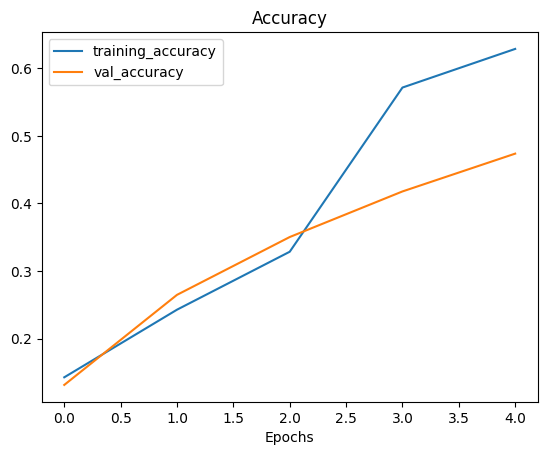

In [ ]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)

# Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-11-01 15:46:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.207, 142.250.128.207, 172.253.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   207MB/s    in 0.8s    

2023-11-01 15:46:57 (207 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
# set data inputs
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

# build data augmnetation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2), # 0.2 good default values, but can be changed
    preprocessing.RandomRotation(0.2),
    # preprocessing.Rescaling(1./255) # if you're using model like resnet
], name="data_augmentation")

# set up input shape
input_shape=(224,224,3)

# create frozen base model (also known as the backbone by Tesla)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create inputs and outputs(including layers inbetween)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augments out training images (remember we don't augment test data)
x = base_model(x, training=False) # pass augmented layer to base layer, but keep in inference mode - which means
# Resnet base layers don't get retrained. This also insures "batchnorm layers" don't get updated
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_2 = create_base_model()

24274472/24274472 [==============================] - 0s 0us/step


#Creating a ModelCheckpoint callback
Creating a ModelCheckpoint callback
Our model is compiled and ready to be fit, so why haven't we fit it yet?

Well, for this experiment we're going to introduce a new callback, the ModelCheckpoint callback.

The ModelCheckpoint callback gives you the ability to save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains.

This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.

For example, say you fit a feature extraction transfer learning model for 5 epochs and you check the training curves and see it was still improving and you want to see if fine-tuning for another 5 epochs could help, you can load the checkpoint, unfreeze some (or all) of the base model layers and then continue training.

In fact, that's exactly what we're going to do.

But first, let's create a ModelCheckpoint callback. To do so, we have to specifcy a directory we'd like to save to.

In [ ]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model : saving only weights saves time
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)



# Fit model 2 passing in the ModelCheckpoint callback

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231101-184654
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9718 - accuracy: 0.3573
Epoch 1: val_loss improved from inf to 1.46552, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 30s 859ms/step - loss: 1.9718 - accuracy: 0.3573 - val_loss: 1.4655 - val_accuracy: 0.6332
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3886 - accuracy: 0.6640
Epoch 2: val_loss improved from 1.46552 to 1.00778, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 727ms/step - loss: 1.3886 - accuracy: 0.6640 - val_loss: 1.0078 - val_accuracy: 0.7730
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0649 - accuracy: 0.7507
Epoch 3: val_loss improved from 1.00778 to 0.82953, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

In [ ]:
# what were model 0 results?
model_0.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.5628 - accuracy: 0.8620


[0.5627880692481995, 0.8619999885559082]

In [ ]:
# check model 2 results on all test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 7s 79ms/step - loss: 0.6552 - accuracy: 0.8308


[0.6552264094352722, 0.8307999968528748]

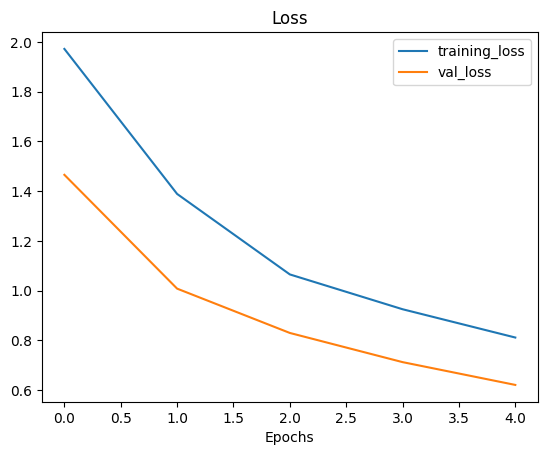

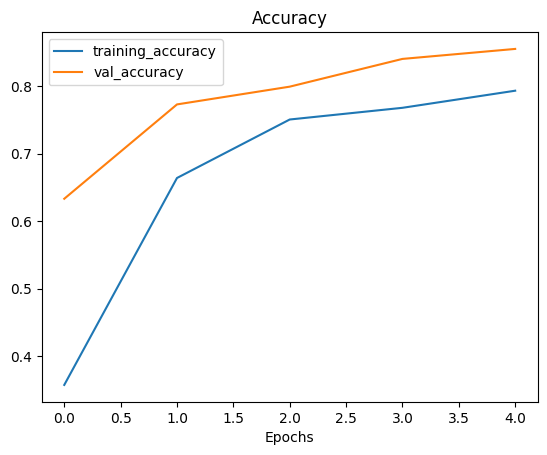

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

# Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.



In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.6552 - accuracy: 0.8308


In [ ]:
# If the results from our native model and the loaded weights are the same, this should output True
results_10_percent_data_aug == loaded_weights_model_results


False

If the above cell doesn't output True, it's because the numbers are close but not the exact same (due to how computers store numbers with degrees of precision).

However, they should be very close...

In [ ]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))
# should say True, True below not sure why not working!

array([ True,  True])

In [ ]:
# Check the difference between the two results (small values)
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[1.1920929e-07 0.0000000e+00]


# Model 3: Fine-tuning an existing model on 10% of the data

High-level example of fine-tuning an EfficientNet model. Bottom layers (layers closer to the input data) stay frozen where as top layers (layers closer to the output data) are updated during training.

So far our saved model has been trained using feature extraction transfer learning for 5 epochs on 10% of the training data and data augmentation.

This means all of the layers in the base model (EfficientNetV2B0) were frozen during training.

For our next experiment we're going to switch to fine-tuning transfer learning. This means we'll be using the same base model except we'll be unfreezing some of its layers (ones closest to the top) and running the model for a few more epochs.

The idea with fine-tuning is to start customizing the pre-trained model more to our own data.

🔑 Note: Fine-tuning usually works best after training a feature extraction model for a few epochs and with large amounts of data. For more on this, check out Keras' guide on Transfer learning & fine-tuning.

We've verified our loaded model's performance, let's check out its layers.

In [ ]:
# layers in loaded model
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7b6bbd3905e0> True
<keras.src.engine.sequential.Sequential object at 0x7b6bbd6d8940> True
<keras.src.engine.functional.Functional object at 0x7b6bb5733700> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b6bb57dfe80> True
<keras.src.layers.core.dense.Dense object at 0x7b6bb5732980> True


In [ ]:
# above, false is there because in code earlier on, we set base_model trainable parameter to False
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable?{layer.trainable}")


Layer number: 0 | Layer name: input_layer | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7b6bbd3905e0> | Trainable?True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.src.engine.sequential.Sequential object at 0x7b6bbd6d8940> | Trainable?True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <keras.src.engine.functional.Functional object at 0x7b6bb5733700> | Trainable?False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b6bb57dfe80> | Trainable?True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.src.layers.core.dense.Dense object at 0x7b6bb5732980> | Trainable?True


In [ ]:
# how many trainable variables are in our base model?
print(len(model_2.layers[2].trainable_variables))


0


In [ ]:

model_2.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
# Access the base_model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name


'efficientnetv2-b0'

In [ ]:
# How many layers are trainable in our model_2_base_model?
print(len(model_2_base_model.trainable_variables)) # layer at index 2 is the EfficientNetV2B0 layer (the base model)


0


In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2

Beautiful. This is exactly what we're after.

Now to fine-tune the base model to our own data, we're going to unfreeze the top 10 layers and continue training our model for another 5 epochs.

This means all of the base model's layers except for the last 10 will remain frozen and untrainable. And the weights in the remaining unfrozen layers will be updated during training.

Ideally, we should see the model's performance improve.

How many layers should you unfreeze when training?

There's no set rule for this. You could unfreeze every layer in the pretrained model or you could try unfreezing one layer at a time. Best to experiment with different amounts of unfreezing and fine-tuning to see what happens. Generally, the less data you have, the less layers you want to unfreeze and the more gradually you want to fine-tune.


In [ ]:
# Make all the layers in model_2_base_model trainable
base_model.trainable = True

# freeze layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable=False

# Recompile the whole model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when finetuning, we should lower lr by x10, so our
                # model isn't changed too much, too soon
                metrics=["accuracy"])

In [ ]:
# Check which layers are tuneable (trainable) - this time last ten should be True as we've unfrozen last ten layers
# with trainable=True and for loop underneath it!
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2

In [ ]:
print(len(model_2.trainable_variables))

2


In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# refit the model (same as model 2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231101-184858
Epoch 5/10
24/24 [==============================] - 22s 544ms/step - loss: 0.7566 - accuracy: 0.8160 - val_loss: 0.6243 - val_accuracy: 0.8586
Epoch 6/10
24/24 [==============================] - 13s 522ms/step - loss: 0.7562 - accuracy: 0.8173 - val_loss: 0.6040 - val_accuracy: 0.8569
Epoch 7/10
24/24 [==============================] - 13s 536ms/step - loss: 0.7606 - accuracy: 0.8027 - val_loss: 0.6206 - val_accuracy: 0.8569
Epoch 8/10
24/24 [==============================] - 12s 477ms/step - loss: 0.7329 - accuracy: 0.8173 - val_loss: 0.6063 - val_accuracy: 0.8602
Epoch 9/10
24/24 [==============================] - 12s 489ms/step - loss: 0.7096 - accuracy: 0.8387 - val_loss: 0.5906 - val_accuracy: 0.8668
Epoch 10/10
24/24 [==============================] - 12s 494ms/step - loss: 0.7416 - accuracy: 0.8160 - val_loss: 0.5967 - val_accuracy: 0.8586


In [ ]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)


79/79 [==============================] - 7s 81ms/step - loss: 0.6124 - accuracy: 0.8396


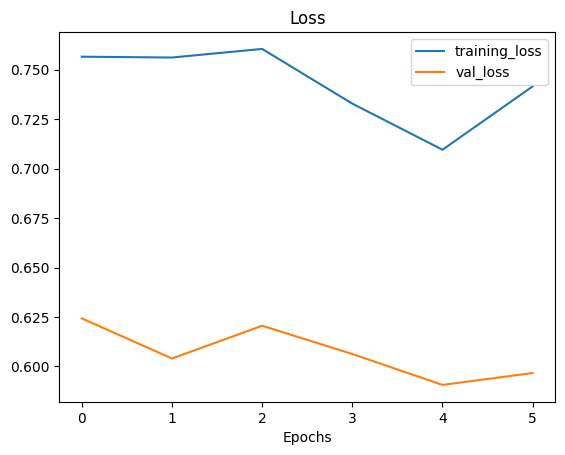

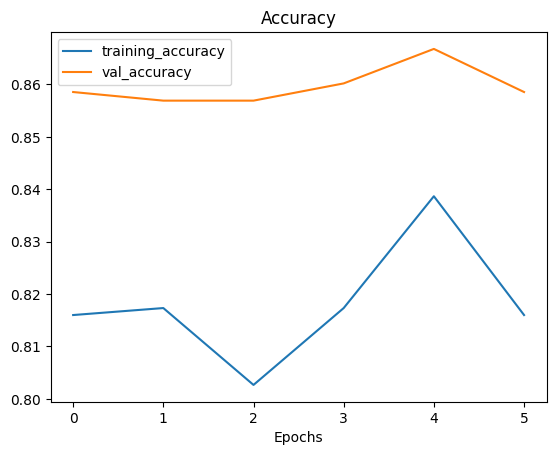

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

# let's create a function to compare training history for new epochs

as plot_loss_curves only shows first 5 epochs

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
  '''
  compares two TensorFlow history objects
  '''
  # get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # combine original history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = acc + new_history.history["val_accuracy"]
  total_val_loss = loss + new_history.history["val_loss"]

  # make plots for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2) # changed to 2 as second subplot
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start fine tuning")
  plt.legend(loc="upper right") # had to move it to upper as was blocking lines of data on plot!
  plt.title("Training and Validation Loss")

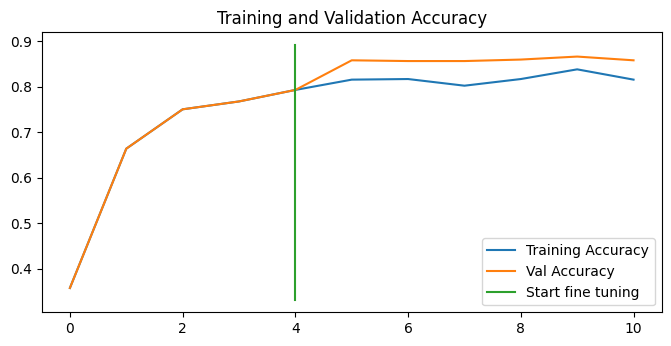

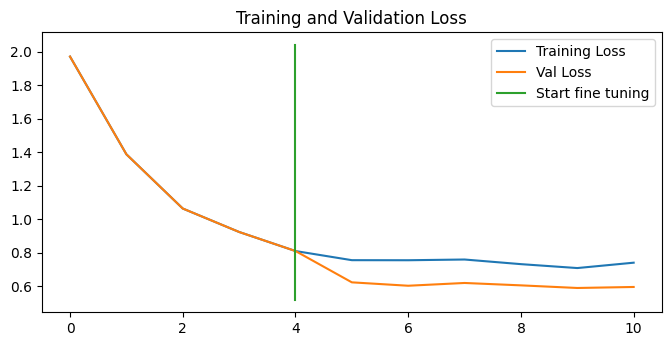

In [ ]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

# Model 4: Fine-tuning an existing model all of the data


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-11-01 18:50:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 108.177.120.207, 142.250.103.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  82.3MB/s    in 6.8s    

2023-11-01 18:50:49 (72.6 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data") # REMEMBER this is from helper functions

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Oh this is looking good. We've got 10x more images in of the training classes to work with.

The test dataset is the same we've been using for our previous experiments.

As it is now, our model_2 has been fine-tuned on 10 percent of the data, so to begin fine-tuning on all of the data and keep our experiments consistent, we need to revert it back to the weights we checkpointed after 5 epochs of feature-extraction.

To demonstrate this, we'll first evaluate the current model_2.

In [ ]:
model_2.evaluate(test_data) # this is actually model 3 because we fine tuned model 3 just above to create
# a variation of model 2, which technically would have been model 3

79/79 [==============================] - 6s 71ms/step - loss: 0.6124 - accuracy: 0.8396


[0.6124274134635925, 0.8396000266075134]

These are the same values as results_fine_tune_10_percent : PROOF of the above

In [ ]:
results_fine_tune_10_percent

[0.6124273538589478, 0.8396000266075134]

To keep our experiments clean, we'll load and create a new instance of model_2 using our create_base_model() function.

More specifically, we're trying to measure:

Experiment 3 (previous one) - model_2 with 10 layers fine-tuned for 5 more epochs on 10% of the data.
Experiment 4 (this one) - model_2 with layers fined-tuned for 5 more epochs on 100% on the data.
Importantly, both experiments should use the same test data (to keep evaluation the same).

And they should also start from the same checkpoint (model_2 feature extractor trained for 5 epochs on 10% of the data).

Let's first create new instance of model_2.

In [ ]:
# Create a new instance of model_2 for Experiment 4
model_2 = create_base_model(learning_rate=0.0001) # 10x lower learning rate for fine-tuning

In [ ]:
# Load previously checkpointed weights
model_2.load_weights(checkpoint_path)

Let's now get a summary and check how many trainable variables there are.

In [ ]:
model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
print(len(model_2.trainable_variables))

2


Nice! This is the same as our original checkpoint.

And the results should be the same as results_10_percent_data_aug.

In [ ]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 11s 79ms/step - loss: 0.6552 - accuracy: 0.8308


[0.6552262902259827, 0.8307999968528748]

In [ ]:
results_10_percent_data_aug # same as above, so model 2 is back to original!

[0.6552264094352722, 0.8307999968528748]

Alright, the previous steps might seem quite confusing but all we've done is:

Trained a feature extraction transfer learning model for 5 epochs on 10% of the data (with all base model layers frozen) and saved the model's weights using ModelCheckpoint (Model 2).

Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen (Model 3).

Saved the results and training logs each time.
Reloaded the model from 1 to do the same steps as 2 but with all (100%) of the data (Model 4).

In [ ]:
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
# Unfreeze the top 10 layers in model_2's base_model
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

Now let's make sure the right layers are trainable (we only want the last 10 to be trainable).

Note: You could experiment which number of layers should be trainable here. Generally, the more data you have, the more layers that can be fine-tuned.

In [ ]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_13 False
2 normalization_7 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2

In [ ]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20231101-191027
Epoch 5/10
235/235 [==============================] - 102s 388ms/step - loss: 0.7137 - accuracy: 0.7747 - val_loss: 0.3929 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 68s 289ms/step - loss: 0.5965 - accuracy: 0.8073 - val_loss: 0.3795 - val_accuracy: 0.8766
Epoch 7/10
235/235 [==============================] - 64s 271ms/step - loss: 0.5413 - accuracy: 0.8264 - val_loss: 0.3395 - val_accuracy: 0.8914
Epoch 8/10
235/235 [==============================] - 54s 229ms/step - loss: 0.4986 - accuracy: 0.8413 - val_loss: 0.3027 - val_accuracy: 0.9079
Epoch 9/10
235/235 [==============================] - 50s 211ms/step - loss: 0.4741 - accuracy: 0.8475 - val_loss: 0.2915 - val_accuracy: 0.9178
Epoch 10/10
235/235 [==============================] - 50s 209ms/step - loss: 0.4572 - accuracy: 0.8489 - val_loss: 0.3004 - val_accuracy: 0.9112


In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data


79/79 [==============================] - 10s 119ms/step - loss: 0.2690 - accuracy: 0.9096


[0.26901257038116455, 0.909600019454956]

In [ ]:
results_fine_tune_10_percent

[0.6124273538589478, 0.8396000266075134]

Nice! It looks like fine-tuning with all of the data has given our model a boost, how do the training curves look?

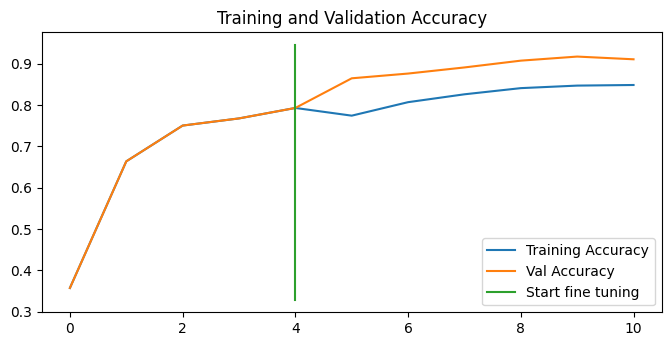

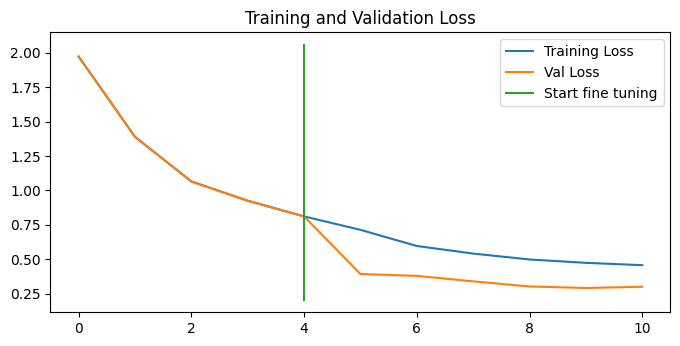

In [ ]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)